In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
test_data = pd.read_csv(r"c:\Users\rkavi\OneDrive\Titanic-Dataset.csv")

In [5]:
test_data.shape

(891, 12)

In [6]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data = test_data.drop(['Cabin'],axis=1)

In [11]:
test_data = test_data.drop(['PassengerId','Name','Ticket'],axis=1)

In [12]:
print(test_data.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [13]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [14]:
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Age'].mode()[0])

In [15]:
test_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
mapping = {'C':0,'Q':1,'S':2}
test_data['Embarked'] = test_data['Embarked'].map(mapping)

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [19]:
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2.0
1,1,1,female,38.0,1,0,71.2833,0.0
2,1,3,female,26.0,0,0,7.9250,2.0
3,1,1,female,35.0,1,0,53.1000,2.0
4,0,3,male,35.0,0,0,8.0500,2.0


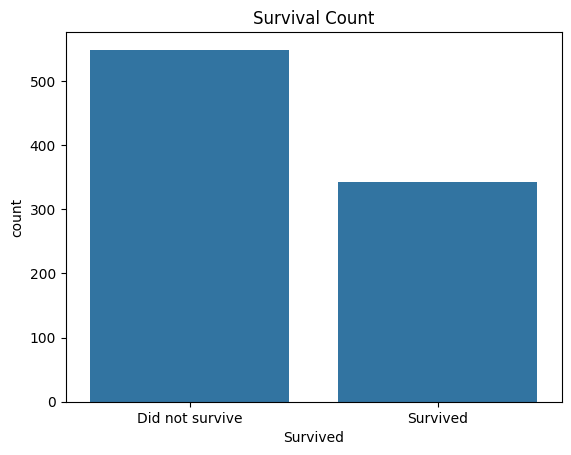

In [20]:
sns.countplot(x='Survived', data=test_data)
plt.title('Survival Count')
plt.xticks([0, 1],['Did not survive', 'Survived'])
plt.show()                   
                  

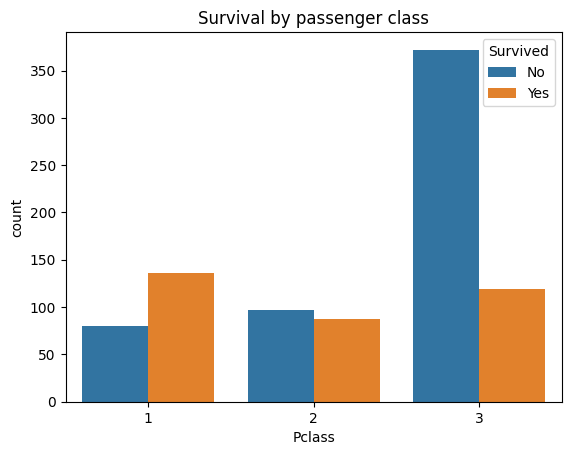

In [21]:
sns.countplot(x='Pclass',hue='Survived',data=test_data)
plt.title('Survival by passenger class')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

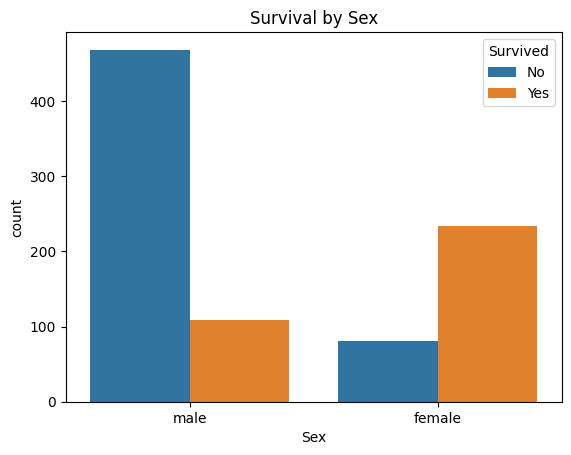

In [22]:
sns.countplot(x='Sex',hue='Survived',data=test_data)
plt.title('Survival by Sex')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

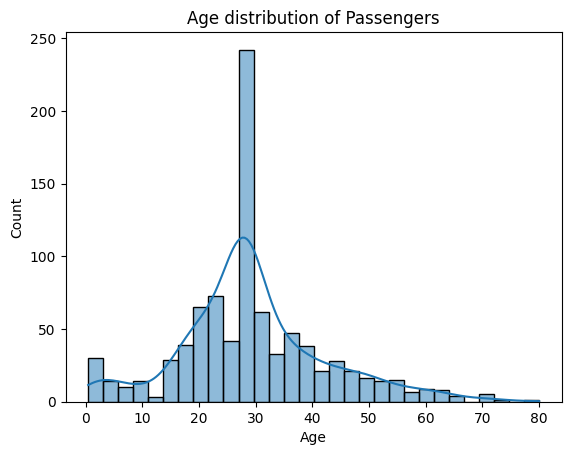

In [23]:
sns.histplot(test_data['Age'], kde=True, bins=30)
plt.title('Age distribution of Passengers')
plt.xlabel('Age')
plt.show()

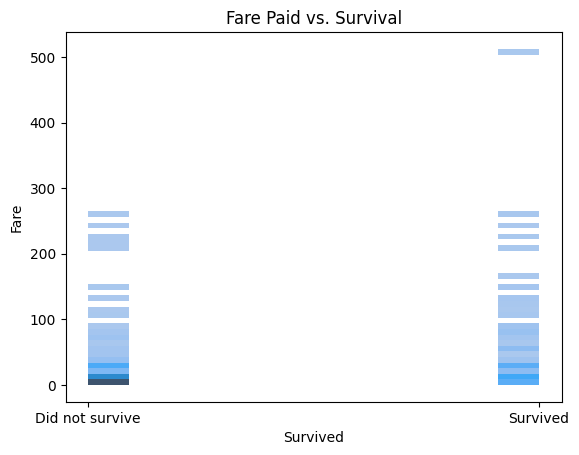

In [24]:
sns.histplot(x='Survived', y='Fare',data=test_data)
plt.title('Fare Paid vs. Survival')
plt.xticks([0,1],['Did not survive', 'Survived'])
plt.show()
             

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [26]:
test_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [27]:
test_data["Fare"].isnull().sum()

np.int64(0)

In [28]:
Age_data=test_data[["Survived","Pclass","Age","Fare"]]

In [29]:
with_null=Age_data.loc[Age_data["Age"].isnull()]
without_null=Age_data.loc[Age_data["Age"].notna()]

In [30]:
with_null.describe()

,Survived,Pclass,Age,Fare
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [31]:
without_null.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
age_prediction=LinearRegression()
age_prediction.fit(without_null.drop("Age", axis=1), without_null['Age'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2.0
1,1,1,female,38.0,1,0,71.2833,0.0
2,1,3,female,26.0,0,0,7.9250,2.0
3,1,1,female,35.0,1,0,53.1000,2.0
4,0,3,male,35.0,0,0,8.0500,2.0


In [35]:
average_age_of_survived=test_data["Age"].mean()
print(average_age_of_survived)

29.36158249158249


In [36]:
test_data['Sex_Encoded']= test_data['Sex'].map({"male":1,"female":2})

In [37]:
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,22.0,1,0,7.2500,2.0,1
1,1,1,female,38.0,1,0,71.2833,0.0,2
2,1,3,female,26.0,0,0,7.9250,2.0,2
3,1,1,female,35.0,1,0,53.1000,2.0,2
4,0,3,male,35.0,0,0,8.0500,2.0,1


In [38]:
test_data[["Sex","Sex_Encoded"]].head(10)

,Sex,Sex_Encoded
0,male,1
1,female,2
2,female,2
3,female,2
4,male,1
5,male,1
6,male,1
7,male,1
8,female,2
9,female,2


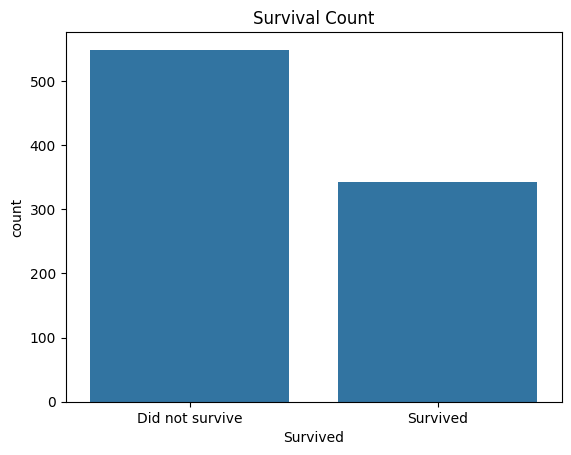

In [41]:
sns.countplot(x='Survived', data=test_data)
plt.title('Survival Count')
plt.xticks([0, 1],['Did not survive', 'Survived'])
plt.show()